In [217]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [448]:
df = pd.read_csv("F1_EDA_complete.csv")
df.head()

,raceId,year,circuitId,race_name,driverId,constructorId,race_points,race_fastestLapTime,race_fastestLapSpeed,dob,...,constructor_points,constructor_name,q1_complete,q2_complete,q3_complete,age,driver_name,lap_minutes,lap_seconds,fastest_lap_seconds
0,948,2016,1,Australian Grand Prix,3,131,25.0,5/29/2024 1:30,210.815,6/27/1985,...,43.0,Mercedes,1,1,1,38,Nico Rosberg,1,30,90
1,948,2016,1,Australian Grand Prix,1,131,18.0,5/29/2024 1:30,210.608,1/7/1985,...,43.0,Mercedes,1,1,1,39,Lewis Hamilton,1,30,90
2,948,2016,1,Australian Grand Prix,20,6,15.0,5/29/2024 1:29,212.235,7/3/1987,...,15.0,Ferrari,1,1,1,36,Sebastian Vettel,1,29,89
3,948,2016,1,Australian Grand Prix,817,9,12.0,5/29/2024 1:28,214.510,7/1/1989,...,12.0,Red Bull,1,1,1,34,Daniel Ricciardo,1,28,88
4,948,2016,1,Australian Grand Prix,13,3,10.0,5/29/2024 1:32,206.861,4/25/1981,...,14.0,Williams,1,1,1,43,Felipe Massa,1,32,92


In [450]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3481 entries, 0 to 3480
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   raceId                3481 non-null   int64  
 1   year                  3481 non-null   int64  
 2   circuitId             3481 non-null   int64  
 3   race_name             3481 non-null   object 
 4   driverId              3481 non-null   int64  
 5   constructorId         3481 non-null   int64  
 6   race_points           3481 non-null   float64
 7   race_fastestLapTime   3481 non-null   object 
 8   race_fastestLapSpeed  3481 non-null   float64
 9   dob                   3481 non-null   object 
 10  qualifyId             3471 non-null   float64
 11  circuit_name          3481 non-null   object 
 12  circuit_altitude      3481 non-null   int64  
 13  constructor_points    3481 non-null   float64
 14  constructor_name      3481 non-null   object 
 15  q1_complete          

# Linear Regression

In [453]:
# Importing needed modules
from statsmodels.formula.api import ols

# Running Model 1:
model1 = ols("fastest_lap_seconds ~ year + race_points + race_fastestLapSpeed + circuit_altitude + constructor_points + C(constructor_name) +\
             q1_complete + q2_complete + q3_complete + age", data = df).fit()

# look at model summary
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     fastest_lap_seconds   R-squared:                       0.554
Model:                             OLS   Adj. R-squared:                  0.551
Method:                  Least Squares   F-statistic:                     172.0
Date:                 Wed, 05 Jun 2024   Prob (F-statistic):               0.00
Time:                         14:19:38   Log-Likelihood:                -14207.
No. Observations:                 3481   AIC:                         2.847e+04
Df Residuals:                     3455   BIC:                         2.863e+04
Df Model:                           25                                         
Covariance Type:             nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                              1813.1687    272.999      6.642      0.000    1277.913    2348.425
C(constructor_name)[T.AlphaTauri]        -0.7115      1.540     -0.462      0.644      -3.731       2.308
C(constructor_name)[T.Alpine F1 Team]     1.1190      1.584      0.707      0.480      -1.986       4.224
C(constructor_name)[T.Aston Martin]       0.4834      1.576      0.307      0.759      -2.606       3.573
C(constructor_name)[T.Ferrari]           -1.6129      1.451     -1.111      0.267      -4.459       1.233
C(constructor_name)[T.Force India]       -0.4384      1.771     -0.248      0.804      -3.910       3.033
C(constructor_name)[T.Haas F1 Team]       0.3135      1.284      0.244      0.807      -2.204       2.831
C(constructor_name)[T.Manor Marussia]     6.0260      2.578      2.337      0.019       0.971      11.081
C(constructor_name)[T.McLaren]            0.0576      1.323      0.044      0.965      -2.536       2.652
C(constructor_name)[T.Mercedes]          -2.1412      1.558     -1.374      0.169      -5.196       0.914
C(constructor_name)[T.RB F1 Team]         1.9103      4.290      0.445      0.656      -6.502      10.322
C(constructor_name)[T.Racing Point]      -3.6967      1.973     -1.873      0.061      -7.565       0.172
C(constructor_name)[T.Red Bull]          -1.7163      1.543     -1.112      0.266      -4.742       1.309
C(constructor_name)[T.Renault]            0.7045      1.503      0.469      0.639      -2.241       3.650
C(constructor_name)[T.Sauber]             2.4339      1.685      1.444      0.149      -0.871       5.738
C(constructor_name)[T.Toro Rosso]         1.3452      1.614      0.833      0.405      -1.820       4.510
C(constructor_name)[T.Williams]           0.9759      1.310      0.745      0.456      -1.592       3.544
year                                     -0.8881      0.135     -6.592      0.000      -1.152      -0.624
race_points                              -0.0154      0.070     -0.219      0.827      -0.153       0.122
race_fastestLapSpeed                      0.3353      0.005     62.374      0.000       0.325       0.346
circuit_altitude                         -0.0066      0.001    -12.604      0.000      -0.008      -0.006
constructor_points                       -0.0016      0.045     -0.036      0.971      -0.090       0.087
q1_complete                               0.5425      2.392      0.227      0.821      -4.147       5.232
q2_complete                              -0.8827      0.719     -1.228      0.219      -2.292       0.526
q3_complete                              -0.0540      0.697     -0.078      0.938      -1.420       1.312
age                                       0.0359      0.051      0.703      0.482      -0.064       0.13

Model 1 includes the predictive variables year, race points, race fastest lap speed, circuit altitude, constructor points, constructor name, Q1 Q2 and Q3 complete, and age.

The model automatically created dummy variables for Constructor Name. However, since most of the constructor names are not relevant, I will proceed to run another model without this variable.

In [456]:
# Running Model 2:
model2 = ols("fastest_lap_seconds ~ year + race_points + race_fastestLapSpeed + circuit_altitude + constructor_points + q1_complete + q2_complete + q3_complete + age", data = df).fit()

# look at model summary
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     fastest_lap_seconds   R-squared:                       0.552
Model:                             OLS   Adj. R-squared:                  0.550
Method:                  Least Squares   F-statistic:                     474.3
Date:                 Wed, 05 Jun 2024   Prob (F-statistic):               0.00
Time:                         14:19:43   Log-Likelihood:                -14218.
No. Observations:                 3481   AIC:                         2.846e+04
Df Residuals:                     3471   BIC:                         2.852e+04
Df Model:                            9                                         
Covariance Type:             nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             1981.7278    217.685      9.104      0.000    1554.925    2408.530
year                    -0.9711      0.108     -9.028      0.000      -1.182      -0.760
race_points             -0.0158      0.070     -0.226      0.821      -0.153       0.122
race_fastestLapSpeed     0.3362      0.005     62.779      0.000       0.326       0.347
circuit_altitude        -0.0066      0.001    -12.635      0.000      -0.008      -0.006
constructor_points      -0.0584      0.039     -1.483      0.138      -0.136       0.019
q1_complete              0.7910      2.389      0.331      0.741      -3.894       5.476
q2_complete             -1.2441      0.695     -1.790      0.073      -2.607       0.118
q3_complete             -0.3609      0.681     -0.530      0.596      -1.697       0.975
age                      0.0196      0.046      0.426      0.670      -0.071       0.110
==============================================================================
Omnibus:                      155.570   Durbin-Watson:                   0.306
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              256.264
Skew:                           0.377   Prob(JB):                     2.25e-56
Kurtosis:                       4.095   Cond. No.                     1.82e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.82e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Model 2 R-Squared and adjusted R-squared are slightly lower than Model 1. I will run another model getting rid of race points to see if it improves. 

In [459]:
# Running Model 3:
model3 = ols("fastest_lap_seconds ~ year + race_fastestLapSpeed + circuit_altitude + constructor_points + q1_complete + q2_complete + q3_complete + age", data = df).fit()

# look at model summary
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     fastest_lap_seconds   R-squared:                       0.552
Model:                             OLS   Adj. R-squared:                  0.550
Method:                  Least Squares   F-statistic:                     533.7
Date:                 Wed, 05 Jun 2024   Prob (F-statistic):               0.00
Time:                         14:19:48   Log-Likelihood:                -14218.
No. Observations:                 3481   AIC:                         2.845e+04
Df Residuals:                     3472   BIC:                         2.851e+04
Df Model:                            8                                         
Covariance Type:             nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             1979.1291    217.351      9.106      0.000    1552.980    2405.278
year                    -0.9698      0.107     -9.030      0.000      -1.180      -0.759
race_fastestLapSpeed     0.3360      0.005     63.286      0.000       0.326       0.346
circuit_altitude        -0.0066      0.001    -12.636      0.000      -0.008      -0.006
constructor_points      -0.0656      0.023     -2.822      0.005      -0.111      -0.020
q1_complete              0.7887      2.389      0.330      0.741      -3.895       5.473
q2_complete             -1.2447      0.695     -1.792      0.073      -2.607       0.117
q3_complete             -0.3801      0.676     -0.562      0.574      -1.706       0.945
age                      0.0197      0.046      0.429      0.668      -0.071       0.110
==============================================================================
Omnibus:                      155.850   Durbin-Watson:                   0.306
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              256.894
Skew:                           0.377   Prob(JB):                     1.64e-56
Kurtosis:                       4.096   Cond. No.                     1.82e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.82e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Model did not improve by taking out variable race points.

In [462]:
# Running Model 4:
model4 = ols("fastest_lap_seconds ~ year + race_fastestLapSpeed + circuit_altitude + constructor_points + q1_complete + q2_complete + q3_complete", data = df).fit()

# look at model summary
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     fastest_lap_seconds   R-squared:                       0.551
Model:                             OLS   Adj. R-squared:                  0.551
Method:                  Least Squares   F-statistic:                     610.0
Date:                 Wed, 05 Jun 2024   Prob (F-statistic):               0.00
Time:                         14:19:51   Log-Likelihood:                -14219.
No. Observations:                 3481   AIC:                         2.845e+04
Df Residuals:                     3473   BIC:                         2.850e+04
Df Model:                            7                                         
Covariance Type:             nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             2012.7289    202.703      9.929      0.000    1615.301    2410.157
year                    -0.9862      0.100     -9.824      0.000      -1.183      -0.789
race_fastestLapSpeed     0.3361      0.005     63.316      0.000       0.326       0.346
circuit_altitude        -0.0066      0.001    -12.638      0.000      -0.008      -0.006
constructor_points      -0.0647      0.023     -2.795      0.005      -0.110      -0.019
q1_complete              0.7904      2.389      0.331      0.741      -3.893       5.474
q2_complete             -1.2254      0.693     -1.768      0.077      -2.585       0.134
q3_complete             -0.3781      0.676     -0.559      0.576      -1.703       0.947
==============================================================================
Omnibus:                      155.530   Durbin-Watson:                   0.306
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              256.091
Skew:                           0.377   Prob(JB):                     2.46e-56
Kurtosis:                       4.094   Cond. No.                     1.70e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.7e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Model 4 confirms that the more variables we take out, the worst the model performs, even if the variables are insignificant. Model 1 was the best model, but it still only explains 55% of the vartiation in Fastest Lap Seconds. Hence, this model is not good at predicting the number of seconds. 

# LMM

In [466]:
import researchpy as rp
import statsmodels.api as sm
from statsmodels.regression.mixed_linear_model import MixedLM
import scipy.stats as stats

In [468]:
df_lmm = pd.read_csv("F1_EDA_complete.csv")

In [470]:
# Convert q1_complete binary to 'Yes'/'No'
df_lmm['q1_complete'] = df_lmm['q1_complete'].map({0: 'No', 1: 'Yes'})

print(df_lmm)

      raceId  year  circuitId              race_name  driverId  constructorId  \
0        948  2016          1  Australian Grand Prix         3            131   
1        948  2016          1  Australian Grand Prix         1            131   
2        948  2016          1  Australian Grand Prix        20              6   
3        948  2016          1  Australian Grand Prix       817              9   
4        948  2016          1  Australian Grand Prix        13              3   
...      ...   ...        ...                    ...       ...            ...   
3476    1126  2024         79       Miami Grand Prix       822             15   
3477    1126  2024         79       Miami Grand Prix       840            117   
3478    1126  2024         79       Miami Grand Prix       848              3   
3479    1126  2024         79       Miami Grand Prix       825            210   
3480    1126  2024         79       Miami Grand Prix       858              3   

      race_points race_fast

In [472]:
# Convert q2_complete binary to 'Yes'/'No'
df_lmm['q2_complete'] = df_lmm['q2_complete'].map({0: 'No', 1: 'Yes'})

print(df_lmm)

      raceId  year  circuitId              race_name  driverId  constructorId  \
0        948  2016          1  Australian Grand Prix         3            131   
1        948  2016          1  Australian Grand Prix         1            131   
2        948  2016          1  Australian Grand Prix        20              6   
3        948  2016          1  Australian Grand Prix       817              9   
4        948  2016          1  Australian Grand Prix        13              3   
...      ...   ...        ...                    ...       ...            ...   
3476    1126  2024         79       Miami Grand Prix       822             15   
3477    1126  2024         79       Miami Grand Prix       840            117   
3478    1126  2024         79       Miami Grand Prix       848              3   
3479    1126  2024         79       Miami Grand Prix       825            210   
3480    1126  2024         79       Miami Grand Prix       858              3   

      race_points race_fast

In [474]:
# Convert q3_complete binary to 'Yes'/'No'
df_lmm['q3_complete'] = df_lmm['q3_complete'].map({0: 'No', 1: 'Yes'})

print(df_lmm)

      raceId  year  circuitId              race_name  driverId  constructorId  \
0        948  2016          1  Australian Grand Prix         3            131   
1        948  2016          1  Australian Grand Prix         1            131   
2        948  2016          1  Australian Grand Prix        20              6   
3        948  2016          1  Australian Grand Prix       817              9   
4        948  2016          1  Australian Grand Prix        13              3   
...      ...   ...        ...                    ...       ...            ...   
3476    1126  2024         79       Miami Grand Prix       822             15   
3477    1126  2024         79       Miami Grand Prix       840            117   
3478    1126  2024         79       Miami Grand Prix       848              3   
3479    1126  2024         79       Miami Grand Prix       825            210   
3480    1126  2024         79       Miami Grand Prix       858              3   

      race_points race_fast

In [476]:
# import methods for running LMMs from statsmodels
import statsmodels.formula.api as smf

## ICC 

In [479]:
import statsmodels.formula.api as smf
formula = 'race_points ~ 1'
null_model = smf.mixedlm(formula, data=df_lmm, groups='constructor_name')
null_results = null_model.fit()

In [481]:
null_results.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
            Mixed Linear Model Regression Results
==============================================================
Model:               MixedLM  Dependent Variable:  race_points
No. Observations:    3481     Method:              REML       
No. Groups:          17       Scale:               27.1728    
Min. group size:     12       Log-Likelihood:      -10725.4065
Max. group size:     344      Converged:           Yes        
Mean group size:     204.8                                    
--------------------------------------------------------------
                     Coef.  Std.Err.   z   P>|z| [0.025 0.975]
--------------------------------------------------------------
Intercept             3.776    1.059 3.566 0.000  1.701  5.852
constructor_name Var 18.770    1.287                          
==============================================================

"""

In [483]:
18.770/(18.770+27.1728)

0.4085515031735114

0.409 suggests that there is meaningful variation between the constructors included in the analysis.

### Random Intercept 

In [487]:
ri_model2 = smf.mixedlm("race_points ~ C(q1_complete) + C(q2_complete) + C(q3_complete) + constructor_points + race_fastestLapSpeed + circuit_altitude + age + fastest_lap_seconds", df_lmm, groups= "constructor_name").fit()

ri_model2.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                    Mixed Linear Model Regression Results
==============================================================================
Model:                   MixedLM        Dependent Variable:        race_points
No. Observations:        3481           Method:                    REML       
No. Groups:              17             Scale:                     12.1694    
Min. group size:         12             Log-Likelihood:            inf        
Max. group size:         344            Converged:                 Yes        
Mean group size:         204.8                                                
------------------------------------------------------------------------------
                      Coef.    Std.Err.    z    P>|z|    [0.025       0.975]  
------------------------------------------------------------------------------
Intercept              0.000 3866770.116  0.000 1.000 -7578730.163 7578730.163
C(q1_complete)[T.Yes]  0.136       0.580  0.234 0.815       -1.001       1.273
C(q2_complete)[T.Yes]  0.100       0.174  0.572 0.568       -0.242       0.441
C(q3_complete)[T.Yes]  1.238       0.168  7.382 0.000        0.909       1.566
constructor_points     0.452       0.008 58.352 0.000        0.437       0.467
race_fastestLapSpeed   0.009       0.002  4.944 0.000        0.006       0.013
circuit_altitude      -0.000       0.000 -0.056 0.955       -0.000       0.000
age                    0.005       0.011  0.449 0.654       -0.017       0.027
fastest_lap_seconds    0.001       0.004  0.159 0.874       -0.007       0.009
constructor_name Var   0.000                                                  
==============================================================================

"""

Performing Random Intercept, Random Slope, and Random Intercept & Slope to compare Log-Likelihood. Inf is high. 

### Random Slope

In [491]:
rs_model = smf.mixedlm("race_points ~ C(q1_complete) + C(q2_complete) + C(q3_complete) + constructor_points + race_fastestLapSpeed + circuit_altitude + age + fastest_lap_seconds", df_lmm, groups= "constructor_name",
                     vc_formula = {"construtor_points" : "0 + constructor_points"}).fit()

rs_model.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
              Mixed Linear Model Regression Results
=================================================================
Model:                MixedLM   Dependent Variable:   race_points
No. Observations:     3481      Method:               REML       
No. Groups:           17        Scale:                12.1576    
Min. group size:      12        Log-Likelihood:       -9403.9452 
Max. group size:      344       Converged:            Yes        
Mean group size:      204.8                                      
-----------------------------------------------------------------
                       Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------
Intercept              -2.306    0.709 -3.254 0.001 -3.695 -0.917
C(q1_complete)[T.Yes]   0.148    0.579  0.256 0.798 -0.987  1.283
C(q2_complete)[T.Yes]   0.052    0.170  0.309 0.757 -0.280  0.385
C(q3_complete)[T.Yes]   1.228    0.165  7.453 0.000  0.905  1.550
constructor_points      0.436    3.386  0.129 0.897 -6.200  7.072
race_fastestLapSpeed    0.009    0.002  4.958 0.000  0.006  0.013
circuit_altitude       -0.000    0.000 -0.071 0.944 -0.000  0.000
age                     0.000    0.011  0.007 0.995 -0.021  0.022
fastest_lap_seconds     0.001    0.004  0.226 0.822 -0.007  0.009
construtor_points Var 194.521                                    
=================================================================

"""

Better log-likelihood with Random Slope.  

### Random Intercept & Slope

In [684]:
f1_model = smf.mixedlm("race_points ~ C(q1_complete) + C(q2_complete) + C(q3_complete) + \
                        constructor_points + race_fastestLapSpeed + circuit_altitude + age + \
                        fastest_lap_seconds", 
                       df_lmm, groups="constructor_name", re_formula="1 + constructor_points").fit()
f1_model.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Mixed Linear Model Regression Results
====================================================================================
Model:                     MixedLM          Dependent Variable:          race_points
No. Observations:          3481             Method:                      REML       
No. Groups:                17               Scale:                       12.1638    
Min. group size:           12               Log-Likelihood:              -9302.2741 
Max. group size:           344              Converged:                   Yes        
Mean group size:           204.8                                                    
------------------------------------------------------------------------------------
                                          Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------------------------
Intercept                                  4.148    0.574  7.232 0.000  3.024  5.272
C(q1_complete)[T.Yes]                      0.133    0.581  0.229 0.819 -1.006  1.271
C(q2_complete)[T.Yes]                      0.077    0.172  0.451 0.652 -0.259  0.414
C(q3_complete)[T.Yes]                      1.243    0.170  7.331 0.000  0.911  1.575
constructor_points                         5.775    0.141 40.881 0.000  5.498  6.051
race_fastestLapSpeed                       0.428    0.087  4.928 0.000  0.258  0.599
circuit_altitude                          -0.003    0.061 -0.044 0.965 -0.121  0.116
age                                        0.012    0.066  0.179 0.858 -0.118  0.142
fastest_lap_seconds                        0.016    0.088  0.188 0.851 -0.155  0.188
constructor_name Var                       0.018    0.017                           
constructor_name x constructor_points Cov -0.035                                    
constructor_points Var                     0.073    0.040                           
====================================================================================

"""

Random Slope and Random Intercept is the best model out of the three. 

### Viz for LMM

In [499]:
actual_values = df_lmm['race_points']

In [501]:
predicted_values = f1_model.fittedvalues

In [503]:
df_lmm['predicted'] = predicted_values

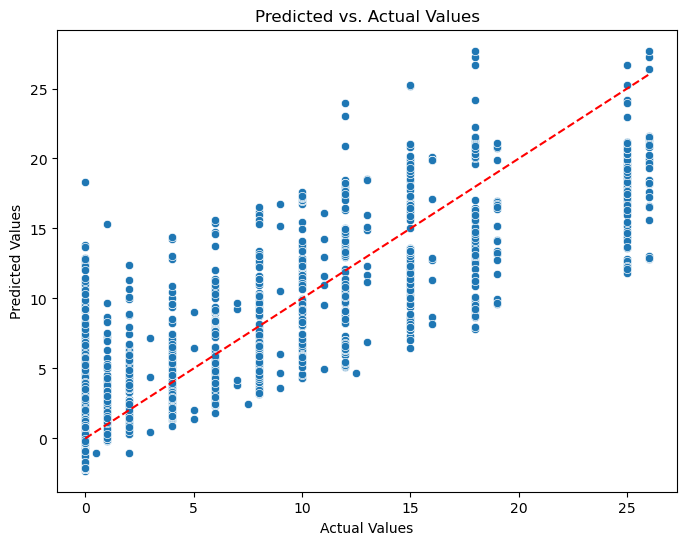

In [505]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='race_points', y='predicted', data=df_lmm)
plt.plot([df_lmm['race_points'].min(), df_lmm['race_points'].max()], [df_lmm['race_points'].min(), df_lmm['race_points'].max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
plt.show()

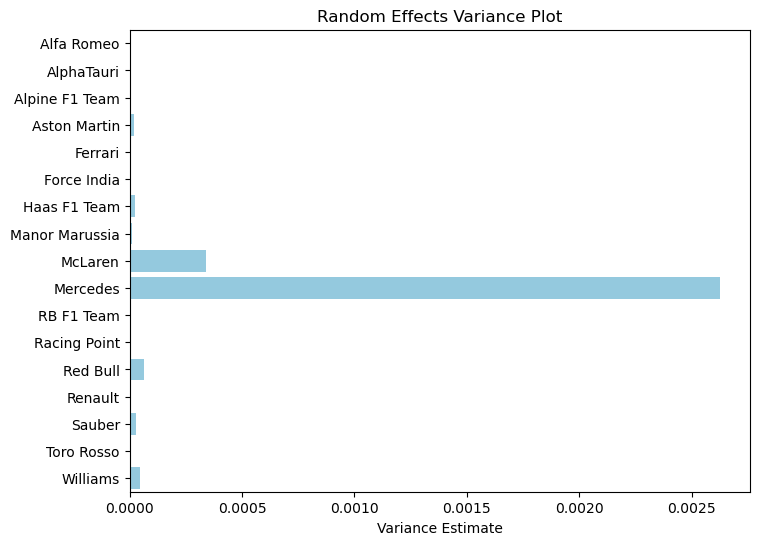

In [507]:
# Extract random effects from the fitted model
random_effects = f1_model.random_effects

# Plot Random Effects Variance Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=[random_effects[key].var() for key in random_effects.keys()], y=list(random_effects.keys()), color='skyblue')
plt.xlabel('Variance Estimate')
plt.title('Random Effects Variance Plot')
plt.show()

# Poisson Models

## Predict Number of Constructor Points 

In [511]:
import statsmodels.api as sm # For GLMs
from statsmodels.formula.api import logit, probit, poisson, ols, glm
import warnings
warnings.filterwarnings('ignore')

In [513]:
print(df['constructor_points'].describe())
print(df['constructor_points'].var())

count    3481.000000
mean       10.246768
std        12.918461
min         0.000000
25%         0.000000
50%         4.000000
75%        18.000000
max        58.000000
Name: constructor_points, dtype: float64
166.88664544307423


In [515]:
## mean and standard deviation should be the same for a poisson distribution

## Poisson Regression # 1 

With Circuit Name 

In [519]:
poisson1 = glm('constructor_points ~ year + race_points + fastest_lap_seconds + race_fastestLapSpeed + age + circuit_altitude + q1_complete + q2_complete + q3_complete + circuit_name', data=df, family=sm.families.Poisson()).fit()

In [520]:
poisson1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:     constructor_points   No. Observations:                 3481
Model:                            GLM   Df Residuals:                     3441
Model Family:                 Poisson   Df Model:                           39
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14463.
Date:                Wed, 05 Jun 2024   Deviance:                       19519.
Time:                        14:20:51   Pearson chi2:                 2.14e+04
No. Iterations:                   100   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
Intercept                                              -36.1470      5.339     -6.770      0.000     -46.612     -25.682
circuit_name[T.Autodromo Enzo e Dino Ferrari]            0.0795      0.046      1.712      0.087      -0.012       0.170
circuit_name[T.Autodromo Internazionale del Mugello]    -0.0111      0.073     -0.154      0.878      -0.153       0.131
circuit_name[T.Autodromo Nazionale di Monza]            -0.0377      0.035     -1.083      0.279      -0.106       0.031
circuit_name[T.Autódromo Hermanos Rodríguez]             0.0289      0.042      0.687      0.492      -0.054       0.111
circuit_name[T.Autódromo Internacional do Algarve]      -0.0009      0.055     -0.016      0.987      -0.109       0.107
circuit_name[T.Autódromo José Carlos Pace]               0.0909      0.028      3.279      0.001       0.037       0.145
circuit_name[T.Bahrain International Circuit]            0.0710      0.036      1.956      0.050      -0.000       0.142
circuit_name[T.Baku City Circuit]                        0.1806      0.044      4.082      0.000       0.094       0.267
circuit_name[T.Circuit Gilles Villeneuve]                0.0061      0.039      0.155      0.877      -0.071       0.083
circuit_name[T.Circuit Park Zandvoort]                  -0.0210      0.049     -0.431      0.667      -0.117       0.075
circuit_name[T.Circuit Paul Ricard]                      0.0539      0.039      1.382      0.167      -0.023       0.130
circuit_name[T.Circuit de Barcelona-Catalunya]           0.0270      0.035      0.774      0.439      -0.041       0.095
circuit_name[T.Circuit de Monaco]                        0.0932      0.042      2.206      0.027       0.010       0.176
circuit_name[T.Circuit de Spa-Francorchamps]             0.1272      0.033      3.832      0.000       0.062       0.192
circuit_name[T.Circuit of the Americas]                  0.1837      0.040      4.631      0.000       0.106       0.261
circuit_name[T.Hockenheimring]                           0.1059      0.048      2.216      0.027       0.012       0.199
circuit_name[T.Hungaroring]                              0.0578      0.033      1.758      0.079      -0.007       0.122
circuit_name[T.Istanbul Park]                            0.1211      0.057      2.121      0.034       0.009       0.233
circuit_name[T.Jeddah Corniche Circuit]                 -0.0845      0.044     -1.904      0.057      -0.171       0.002
circuit_name[T.Las Vegas Strip Street Circuit]           0.0975      0.068      1.440      0.150      -0.035       0.230
circuit_name[T.Losail International Circuit]             0.1659      0.053      3.131      0.002       0.062       0.270
circuit_name[T.Marina Bay Street Circuit]                0

In [523]:
poisson1_coeffs = pd.DataFrame(poisson1.params)
poisson1_coeffs= poisson1_coeffs.rename(columns={0: "Coefficients"})
poisson1_coeffs

,Coefficients
Intercept,-36.147046
circuit_name[T.Autodromo Enzo e Dino Ferrari],0.079453
circuit_name[T.Autodromo Internazionale del Mugello],-0.011138
circuit_name[T.Autodromo Nazionale di Monza],-0.037679
circuit_name[T.Autódromo Hermanos Rodríguez],0.028915
circuit_name[T.Autódromo Internacional do Algarve],-0.000868
circuit_name[T.Autódromo José Carlos Pace],0.090889
circuit_name[T.Bahrain International Circuit],0.071021
circuit_name[T.Baku City Circuit],0.180584
circuit_name[T.Circuit Gilles Villeneuve],0.006070


In [525]:
poisson1_coefficients = poisson1_coeffs['Coefficients']

print(f'Substantive Effects of Intercept and Variable Coefficients:')
for i in poisson1_coefficients:
    print(round(np.exp(i),4))

Substantive Effects of Intercept and Variable Coefficients:
0.0
1.0827
0.9889
0.963
1.0293
0.9991
1.0951
1.0736
1.1979
1.0061
0.9792
1.0554
1.0274
1.0977
1.1356
1.2017
1.1117
1.0595
1.1288
0.919
1.1024
1.1804
1.2497
1.1761
1.061
0.9965
1.1379
1.1993
1.0112
1.1232
1.0461
1.0686
1.0187
1.0817
0.9956
1.0022
1.0077
1.0
0.3479
2.0774
1.9303


In [527]:
print(poisson1.conf_int())

                                                            0          1
Intercept                                          -46.611754 -25.682338
circuit_name[T.Autodromo Enzo e Dino Ferrari]       -0.011507   0.170414
circuit_name[T.Autodromo Internazionale del Mug...  -0.153354   0.131078
circuit_name[T.Autodromo Nazionale di Monza]        -0.105896   0.030538
circuit_name[T.Autódromo Hermanos Rodríguez]        -0.053529   0.111358
circuit_name[T.Autódromo Internacional do Algarve]  -0.108806   0.107070
circuit_name[T.Autódromo José Carlos Pace]           0.036557   0.145221
circuit_name[T.Bahrain International Circuit]       -0.000129   0.142171
circuit_name[T.Baku City Circuit]                    0.093886   0.267281
circuit_name[T.Circuit Gilles Villeneuve]           -0.070842   0.082981
circuit_name[T.Circuit Park Zandvoort]              -0.116584   0.074567
circuit_name[T.Circuit Paul Ricard]                 -0.022570   0.130383
circuit_name[T.Circuit de Barcelona-Catalunya]     

In [529]:
df['poisson1_fitted_values'] = poisson1.fittedvalues

<Axes: xlabel='race_points', ylabel='constructor_points'>

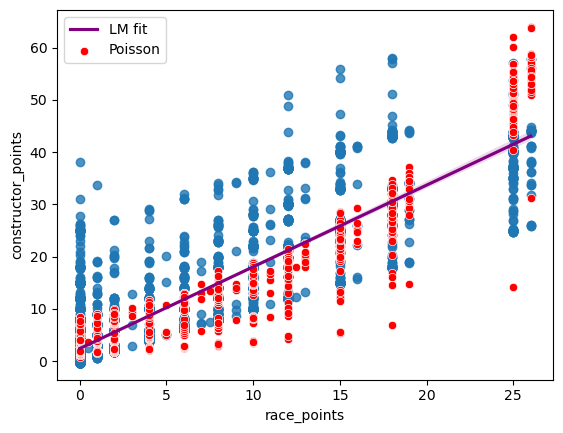

In [531]:
sns.regplot(data = df, x='race_points', y='constructor_points', y_jitter = 0.3, fit_reg = True, line_kws = {'color':'purple','label':'LM fit'})
sns.scatterplot(data = df, x='race_points', y='poisson1_fitted_values', color = 'red', label = 'Poisson')

### Poisson Regression 2

Without Circuit Name

In [535]:
poisson2 = glm('constructor_points ~ year + race_points + fastest_lap_seconds + race_fastestLapSpeed + age + circuit_altitude + q1_complete + q2_complete + q3_complete', data=df, family=sm.families.Poisson()).fit()

In [537]:
poisson2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:     constructor_points   No. Observations:                 3481
Model:                            GLM   Df Residuals:                     3471
Model Family:                 Poisson   Df Model:                            9
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14510.
Date:                Wed, 05 Jun 2024   Deviance:                       19614.
Time:                        14:21:08   Pearson chi2:                 2.16e+04
No. Iterations:                     6   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              -36.9417      4.907     -7.528      0.000     -46.560     -27.323
year                     0.0190      0.002      7.820      0.000       0.014       0.024
race_points              0.0792      0.001    117.480      0.000       0.078       0.081
fastest_lap_seconds     -0.0012      0.000     -3.076      0.002      -0.002      -0.000
race_fastestLapSpeed     0.0007      0.000      3.595      0.000       0.000       0.001
age                      0.0077      0.001      7.753      0.000       0.006       0.010
circuit_altitude      4.692e-06   1.17e-05      0.403      0.687   -1.82e-05    2.75e-05
q1_complete             -1.0779      0.066    -16.209      0.000      -1.208      -0.948
q2_complete              0.7340      0.030     24.305      0.000       0.675       0.793
q3_complete              0.6550      0.019     34.223      0.000       0.618       0.693
========================================================================================
"""

In [539]:
poisson2_coeffs = pd.DataFrame(poisson2.params)
poisson2_coeffs= poisson2_coeffs.rename(columns={0: "Coefficients"})
poisson2_coeffs

,Coefficients
Intercept,-36.941676
year,0.018954
race_points,0.079187
fastest_lap_seconds,-0.001206
race_fastestLapSpeed,0.000667
age,0.007662
circuit_altitude,0.000005
q1_complete,-1.077877
q2_complete,0.734036
q3_complete,0.655014


In [541]:
poisson2_coefficients = poisson2_coeffs['Coefficients']

print(f'Substantive Effects of Intercept and Variable Coefficients:')
for i in poisson2_coefficients:
    print(round(np.exp(i),4))

Substantive Effects of Intercept and Variable Coefficients:
0.0
1.0191
1.0824
0.9988
1.0007
1.0077
1.0
0.3403
2.0835
1.9252


In [543]:
print(poisson2.conf_int())

                              0          1
Intercept            -46.560179 -27.323174
year                   0.014204   0.023705
race_points            0.077866   0.080509
fastest_lap_seconds   -0.001975  -0.000438
race_fastestLapSpeed   0.000303   0.001030
age                    0.005725   0.009599
circuit_altitude      -0.000018   0.000028
q1_complete           -1.208211  -0.947543
q2_complete            0.674843   0.793229
q3_complete            0.617501   0.692527


In [545]:
df['poisson2_fitted_values'] = poisson2.fittedvalues

<Axes: xlabel='race_points', ylabel='constructor_points'>

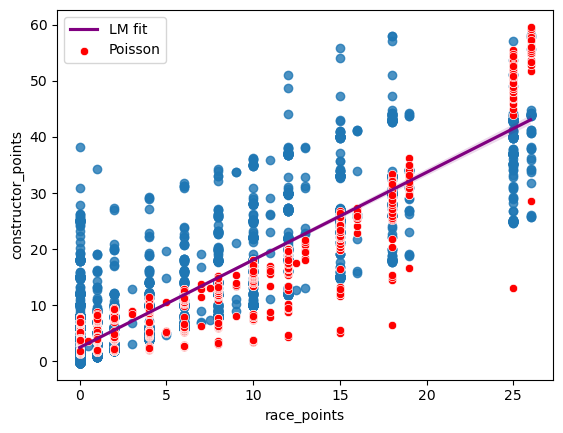

In [547]:
sns.regplot(data = df, x='race_points', y='constructor_points', y_jitter = 0.3, fit_reg = True, line_kws = {'color':'purple','label':'LM fit'})
sns.scatterplot(data = df, x='race_points', y='poisson2_fitted_values', color = 'red', label = 'Poisson')

Including circuit name improves the model, so we will keep it as an input variable.

### Negative Binomial #1

WIth Circuit Name

In [552]:
negativebinomial1 = glm('constructor_points ~ year + race_points + fastest_lap_seconds + race_fastestLapSpeed + age + circuit_altitude + C(q1_complete,Treatment(0)) + q2_complete + q3_complete + circuit_name', data=df, family=sm.families.NegativeBinomial()).fit()

In [553]:
negativebinomial1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:     constructor_points   No. Observations:                 3481
Model:                            GLM   Df Residuals:                     3441
Model Family:        NegativeBinomial   Df Model:                           39
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9790.7
Date:                Wed, 05 Jun 2024   Deviance:                       4319.0
Time:                        14:21:21   Pearson chi2:                 4.78e+03
No. Iterations:                   100   Pseudo R-squ. (CS):             0.6748
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
Intercept                                              -48.3843     18.767     -2.578      0.010     -85.167     -11.602
C(q1_complete, Treatment(0))[T.1]                       -0.9838      0.187     -5.265      0.000      -1.350      -0.618
circuit_name[T.Autodromo Enzo e Dino Ferrari]            0.1984      0.169      1.175      0.240      -0.132       0.529
circuit_name[T.Autodromo Internazionale del Mugello]     0.2529      0.257      0.982      0.326      -0.252       0.758
circuit_name[T.Autodromo Nazionale di Monza]            -0.2251      0.124     -1.812      0.070      -0.469       0.018
circuit_name[T.Autódromo Hermanos Rodríguez]             0.1116      0.150      0.743      0.458      -0.183       0.406
circuit_name[T.Autódromo Internacional do Algarve]      -0.0595      0.197     -0.302      0.763      -0.446       0.327
circuit_name[T.Autódromo José Carlos Pace]               0.0231      0.101      0.227      0.820      -0.176       0.222
circuit_name[T.Bahrain International Circuit]           -0.0979      0.128     -0.765      0.444      -0.349       0.153
circuit_name[T.Baku City Circuit]                        0.1588      0.152      1.047      0.295      -0.139       0.456
circuit_name[T.Circuit Gilles Villeneuve]               -0.1617      0.140     -1.157      0.247      -0.436       0.112
circuit_name[T.Circuit Park Zandvoort]                   0.0384      0.173      0.222      0.824      -0.300       0.377
circuit_name[T.Circuit Paul Ricard]                     -0.2161      0.141     -1.530      0.126      -0.493       0.061
circuit_name[T.Circuit de Barcelona-Catalunya]          -0.1263      0.124     -1.017      0.309      -0.370       0.117
circuit_name[T.Circuit de Monaco]                        0.1285      0.144      0.891      0.373      -0.154       0.411
circuit_name[T.Circuit de Spa-Francorchamps]             0.0454      0.114      0.398      0.691      -0.178       0.269
circuit_name[T.Circuit of the Americas]                  0.0978      0.138      0.711      0.477      -0.172       0.368
circuit_name[T.Hockenheimring]                           0.1809      0.166      1.090      0.276      -0.144       0.506
circuit_name[T.Hungaroring]                             -0.1458      0.117     -1.250      0.211      -0.374       0.083
circuit_name[T.Istanbul Park]                            0.1160      0.201      0.576      0.564      -0.278       0.510
circuit_name[T.Jeddah Corniche Circuit]                 -0.2798      0.159     -1.764      0.078      -0.591       0.031
circuit_name[T.Las Vegas Strip Street Circuit]          -0.0050      0.240     -0.021      0.983      -0.476       0.466
circuit_name[T.Losail International Circuit]             0

In [556]:
negbinomial1_coeffs = pd.DataFrame(negativebinomial1 .params)
negbinomial1_coeffs=negbinomial1_coeffs.rename(columns={0: "Coefficients"})
negbinomial1_coeffs

,Coefficients
Intercept,-48.384326
"C(q1_complete, Treatment(0))[T.1]",-0.983755
circuit_name[T.Autodromo Enzo e Dino Ferrari],0.198376
circuit_name[T.Autodromo Internazionale del Mugello],0.252941
circuit_name[T.Autodromo Nazionale di Monza],-0.225117
circuit_name[T.Autódromo Hermanos Rodríguez],0.111572
circuit_name[T.Autódromo Internacional do Algarve],-0.059475
circuit_name[T.Autódromo José Carlos Pace],0.023060
circuit_name[T.Bahrain International Circuit],-0.097881
circuit_name[T.Baku City Circuit],0.158823


In [558]:
np.exp(0.650585)

1.9166617482357744

In [560]:
negbinomial1_coeffs = negbinomial1_coeffs['Coefficients']

print(f'Substantive Effects of Intercept and Variable Coefficients:')
for i in negbinomial1_coeffs:
    print(round(np.exp(i),4))

Substantive Effects of Intercept and Variable Coefficients:
0.0
0.3739
1.2194
1.2878
0.7984
1.118
0.9423
1.0233
0.9068
1.1721
0.8507
1.0391
0.8057
0.8813
1.1371
1.0465
1.1028
1.1983
0.8643
1.123
0.7559
0.995
1.3147
1.1275
1.013
1.752
0.9648
0.9201
0.9357
0.9126
1.0402
0.8212
0.8168
1.0249
1.1216
0.9944
1.0017
1.0046
0.9999
2.0286
1.9167


In [562]:
df['negbinomial1_fitted_values'] = negativebinomial1.fittedvalues

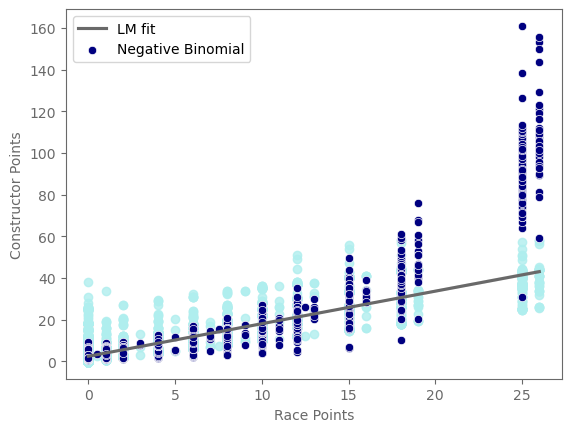

In [564]:
sns.regplot(data = df, x='race_points', y='constructor_points', y_jitter = 0.3, fit_reg = True, color ='paleturquoise',line_kws = {'color':'dimgray','label':'LM fit'})
s=sns.scatterplot(data = df, x='race_points', y='negbinomial1_fitted_values', color = 'navy', label = 'Negative Binomial')
plt.xlabel('Race Points', color='dimgray')
plt.ylabel('Constructor Points', color='dimgray')

s.spines['top'].set_color('dimgray')
s.spines['right'].set_color('dimgray')
s.spines['bottom'].set_color('dimgray')
s.spines['left'].set_color('dimgray')
s.tick_params(axis='x', colors='dimgray')
s.tick_params(axis='y', colors='dimgray')

### Negative Binomial #2

Without Circuit Name

In [568]:
negativebinomial2 = glm('constructor_points ~ year + race_points + fastest_lap_seconds + race_fastestLapSpeed + age + circuit_altitude + q1_complete + q2_complete + q3_complete', data=df, family=sm.families.NegativeBinomial()).fit()

In [570]:
negativebinomial2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:     constructor_points   No. Observations:                 3481
Model:                            GLM   Df Residuals:                     3471
Model Family:        NegativeBinomial   Df Model:                            9
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9814.4
Date:                Wed, 05 Jun 2024   Deviance:                       4366.4
Time:                        14:21:39   Pearson chi2:                 4.95e+03
No. Iterations:                    11   Pseudo R-squ. (CS):             0.6703
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              -54.6522     17.226     -3.173      0.002     -88.414     -20.890
year                     0.0277      0.009      3.260      0.001       0.011       0.044
race_points              0.1148      0.003     38.106      0.000       0.109       0.121
fastest_lap_seconds     -0.0031      0.001     -2.313      0.021      -0.006      -0.000
race_fastestLapSpeed     0.0002      0.001      0.405      0.686      -0.001       0.001
age                      0.0042      0.004      1.190      0.234      -0.003       0.011
circuit_altitude     -4.018e-05   4.22e-05     -0.953      0.341      -0.000    4.25e-05
q1_complete             -1.0086      0.185     -5.451      0.000      -1.371      -0.646
q2_complete              0.7039      0.059     11.841      0.000       0.587       0.820
q3_complete              0.6319      0.052     12.208      0.000       0.530       0.733
========================================================================================
"""

In [572]:
negbinomial2_coeffs = pd.DataFrame(negativebinomial2.params)
negbinomial2_coeffs=negbinomial2_coeffs.rename(columns={0: "Coefficients"})
negbinomial2_coeffs

,Coefficients
Intercept,-54.652177
year,0.027742
race_points,0.114779
fastest_lap_seconds,-0.003101
race_fastestLapSpeed,0.000249
age,0.004239
circuit_altitude,-0.000040
q1_complete,-1.008587
q2_complete,0.703938
q3_complete,0.631871


In [574]:
negbinomial2_coeffs = negbinomial2_coeffs['Coefficients']

print(f'Substantive Effects of Intercept and Variable Coefficients:')
for i in negbinomial2_coeffs:
    print(round(np.exp(i),4))

Substantive Effects of Intercept and Variable Coefficients:
0.0
1.0281
1.1216
0.9969
1.0002
1.0042
1.0
0.3647
2.0217
1.8811


In [576]:
df['negbinomial2_fitted_values'] = negativebinomial2.fittedvalues

<Axes: xlabel='race_points', ylabel='constructor_points'>

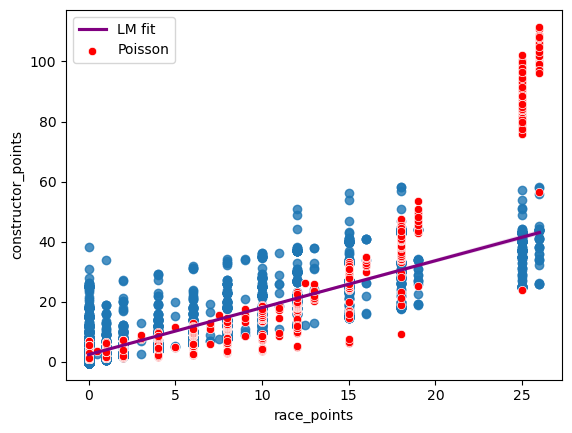

In [578]:
sns.regplot(data = df, x='race_points', y='constructor_points', y_jitter = 0.3, fit_reg = True, line_kws = {'color':'purple','label':'LM fit'})
sns.scatterplot(data = df, x='race_points', y='negbinomial2_fitted_values', color = 'red', label = 'Poisson')

# Factor Analysis

In [581]:
import scipy.stats as stats

from factor_analyzer import FactorAnalyzer

from factor_analyzer.factor_analyzer import calculate_kmo

In [583]:
df_fa = pd.read_csv("F1_EDA_complete.csv")

In [585]:
df_fa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3481 entries, 0 to 3480
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   raceId                3481 non-null   int64  
 1   year                  3481 non-null   int64  
 2   circuitId             3481 non-null   int64  
 3   race_name             3481 non-null   object 
 4   driverId              3481 non-null   int64  
 5   constructorId         3481 non-null   int64  
 6   race_points           3481 non-null   float64
 7   race_fastestLapTime   3481 non-null   object 
 8   race_fastestLapSpeed  3481 non-null   float64
 9   dob                   3481 non-null   object 
 10  qualifyId             3471 non-null   float64
 11  circuit_name          3481 non-null   object 
 12  circuit_altitude      3481 non-null   int64  
 13  constructor_points    3481 non-null   float64
 14  constructor_name      3481 non-null   object 
 15  q1_complete          

In [587]:
F1df1= df_fa.drop(['raceId','year','circuitId','race_name','driverId','constructorId','race_fastestLapTime','dob','qualifyId','circuit_name','constructor_name','driver_name','lap_minutes','lap_seconds'],axis=1)

In [589]:
F1df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3481 entries, 0 to 3480
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   race_points           3481 non-null   float64
 1   race_fastestLapSpeed  3481 non-null   float64
 2   circuit_altitude      3481 non-null   int64  
 3   constructor_points    3481 non-null   float64
 4   q1_complete           3481 non-null   int64  
 5   q2_complete           3481 non-null   int64  
 6   q3_complete           3481 non-null   int64  
 7   age                   3481 non-null   int64  
 8   fastest_lap_seconds   3481 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 244.9 KB


## KMO Test ~ Assessing the Adequacy of F1 Dataset

In [592]:
kmo_all,kmo_model=calculate_kmo(F1df1)

In [594]:
kmo_model

0.6355159331261924

For this dataset, the overall KMO is 0.636. Since it is above the 0.6 threshold, the data is appropriate for Factor Analysis.

In [598]:
# Creating FA object

FA = FactorAnalyzer()
FA.fit(F1df1)

FactorAnalyzer(rotation_kwargs={})

In [600]:
# Checking Eigenvalues
eigen_values, vectors = FA.get_eigenvalues()

eigen_values

array([2.74934512, 1.73564458, 1.05645055, 0.98863936, 0.9711849 ,
       0.73581416, 0.37104323, 0.26291616, 0.12896193])

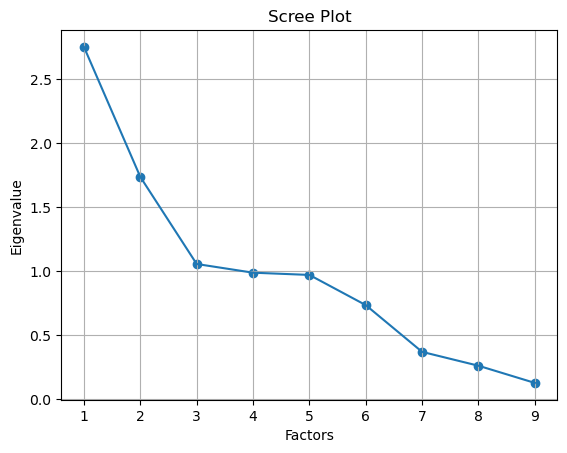

In [602]:
# Creating a scree plot

plt.scatter(range(1, F1df1.shape[1]+1), eigen_values)
plt.plot(range(1, F1df1.shape[1]+1), eigen_values)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

We observe that three factor have an eigen value of more than 1 and 2 more factors have eigen value very close to 1. Therefore, we want to try Factor Analysis by first choosing 3 factors (or unobserved variables) as our k and then with 5 factors as our k.

Factor solution that has an eigenvalue of 1 or above explains more variance than a single observed variable while factor solution with eigenvalue of less than 1 explains less variance that a single variable. This is why we will only retain the factor with eigenvalue of 1 or greater for the Factor Analysis.

### Principal Axis Component Factor Analysis with Varimax rotation (k=3)

In [611]:
FA_p = FactorAnalyzer(3, rotation = "varimax", method = 'principal')
FA_p.fit(F1df1)
loadings_FA_p = FA_p.loadings_

In [614]:
# Checking out loadings
loadings_p = pd.DataFrame(loadings_FA_p, columns=['Factor 1', 'Factor 2','Factor 3'], index= F1df1.columns)
print('Factor Loadings \n%s' %loadings_p)

Factor Loadings 
                      Factor 1  Factor 2  Factor 3
race_points           0.885540  0.083327 -0.169121
race_fastestLapSpeed  0.118747  0.896226 -0.056269
circuit_altitude      0.022845 -0.252581 -0.041720
constructor_points    0.896318  0.035155 -0.165425
q1_complete           0.055541  0.051623  0.902693
q2_complete           0.645672 -0.059364  0.409789
q3_complete           0.804790 -0.047917  0.174120
age                   0.205947  0.020611  0.096185
fastest_lap_seconds   0.012604  0.927896 -0.026306


**Findings from the first model**

For this model that uses principal axis component factor analysis with Varimax rotation, we see that Factor 1 has has a high loading for Race points, Constructor Points and Q3 complete attributes/variables (a factor loading of +-0.7 or greater is considered a high factor loading). This means that over half of the variance is being explained by the factor. Q2 complete has a moderate loading. We will choose to ignore the other variable because it is not explaining much variance. In terms of the association, we see that the three variables are positively associated with each other in Factor 1. On the other hand, for Factor 2, we see that the variables with a high factor loading are race_fastestLapSpeed and fastest_lap_seconds. We also notice that these variables are positively associated with each other. For Factor 3, the only variable with a high factor loading is Q1 complete.

There is a good distinction between the Factors in this model.

#### Variances

In [623]:
FA_variance = pd.DataFrame(FA_p.get_factor_variance(), columns=['Factor 1', 'Factor 2','Factor 3'], 
                           index= ['Loadings', 'Proportional Var', 'Cumulative Var'])
print('3 Factor Model-Factor Variance \n%s' %FA_variance)

3 Factor Model-Factor Variance 
                  Factor 1  Factor 2  Factor 3
Loadings          2.712426  1.745098  1.083916
Proportional Var  0.301381  0.193900  0.120435
Cumulative Var    0.301381  0.495280  0.615716


**Explanation**

From the results, we can see how our variance are partitioned between the three Factors.

Factor 1 loading is carrying more of the weight. With a variance of 2.71, Factor 1 explains 30.1% of the variance while Factor 2 with a variance of 1.75 explains 19.4% of the variance, and Factor 3 with a variance of 1.08 explains 12.0% of the variance. The three Factors explain 61.57% of the cumulative variance, which is not very significant.

Therefore, we might also want to look at a 5 Factor Factor Analysis model and see if that might explain more variance compared to this model.

#### Communalites

In [640]:
FA_communalities = pd.DataFrame(FA_p.get_communalities(), index=F1df1.columns, columns=['Communalities'])
print('3 Factor Model-Factor Communalities \n%s' %FA_communalities)

3 Factor Model-Factor Communalities 
                      Communalities
race_points                0.819726
race_fastestLapSpeed       0.820487
circuit_altitude           0.066059
constructor_points         0.831987
q1_complete                0.820604
q2_complete                0.588344
q3_complete                0.680301
age                        0.052091
fastest_lap_seconds        0.861843


**Explanation**

The communalities measure provides information on the proportion of each variable's variance that can be explained by the factors. For instance, the communality of the race_point variable/item is 0.8197, which means that 81.97% of the variance in this variable is explained by all of the factors taken together.

In general, we can see that a high proportion of their variance is explained by the factors taken together for all of the variables except for age. This means that the uniqueness or the proportion of variance that is distinct to the variable and not shared with other variables is low for all of them except for age and circuit altitude variables. Some other variables to note are q2_complete and q3_complete which have a communalities score of more than 0.55 but they are relatively lower than other variables in our model.

We can conclude that all of the variables other than age and circuit altitude are relevant in the factor model.

### Principal Axis Component Factor Analysis with Varimax rotation (k=5)

In [651]:
FA_p2 = FactorAnalyzer(5, rotation = "varimax", method = 'principal')
FA_p2.fit(F1df1)
loadings_FA_p2 = FA_p2.loadings_

In [654]:
loadings_p2 = pd.DataFrame(loadings_FA_p2, columns=['Factor 1', 'Factor 2','Factor 3','Factor 4','Factor 5'], index= F1df1.columns)
print('5 Factor Model- Factor Loadings \n%s' %loadings_p2)

5 Factor Model- Factor Loadings 
                      Factor 1  Factor 2  Factor 3  Factor 4  Factor 5
race_points           0.890281  0.122371 -0.119427  0.037640  0.029917
race_fastestLapSpeed  0.092567  0.925565  0.000849  0.048614 -0.022630
circuit_altitude      0.000231 -0.069477  0.020882  0.991198  0.006698
constructor_points    0.901372  0.072888 -0.118924  0.034639  0.041240
q1_complete           0.015732  0.026595  0.915673  0.033483 -0.003584
q2_complete           0.627484 -0.071719  0.429639 -0.070636  0.078521
q3_complete           0.801046 -0.038839  0.209258 -0.030528  0.032669
age                   0.086064  0.013037  0.010867  0.006659  0.995142
fastest_lap_seconds  -0.017677  0.919127  0.007311 -0.132709  0.037801


**Findings from the second model**

For this model that uses principal axis component factor analysis with Varimax rotation, we see that Factor 1 has has a high loading for Race points, Constructor Points and Q3 complete attributes/variables (a factor loading of +-0.7 or greater is considered a high factor loading). This means that over half of the variance is being explained by the factor. Q2 complete has a moderate loading. We will choose to ignore the other variable because it is not explaining much variance. In terms of the association, we see that the three variables are positively associated with each other in Factor 1. On the other hand, for Factor 2, we see that the variables with a high factor loading are race_fastestLapSpeed and fastest_lap_seconds. We also notice that these variables are positively associated with each other. For Factor 3, the only variable with a high factor loading is Q1 complete, and for Factor 4, only circuit altitude has a high factor loading. For Factor 5, age is the only variables with a high loading.

There is a good distinction between the Factors in this model.

In [659]:
FA_variance2 = pd.DataFrame(FA_p2.get_factor_variance(), columns=['Factor 1', 'Factor 2','Factor 3','Factor 4','Factor 5'], 
                           index= ['Loadings', 'Proportional Var', 'Cumulative Var'])
print('5 Factor Model- Factor Variance \n%s' %FA_variance2)

5 Factor Model- Factor Variance 
                  Factor 1  Factor 2  Factor 3  Factor 4  Factor 5
Loadings          2.657019  1.734108  1.095850  1.012152  1.002136
Proportional Var  0.295224  0.192679  0.121761  0.112461  0.111348
Cumulative Var    0.295224  0.487903  0.609664  0.722125  0.833474


**Explanation**

From the results, we can see how our variance are partitioned between the three Factors.

Factor 1 loading is carrying more of the weight. With a variance of 2.71, Factor 1 explains 30.1% of the variance while Factor 2 with a variance of 1.75 explains 19.4% of the variance, and Factor 3 with a variance of 1.08 explains 12.0% of the variance. The three Factors explain 61.57% of the cumulative variance, which is not very significant.

We see that a 5 Factor model explains significantly more variance than the 3 Factor model, so this model is better.

#### Communalities

In [667]:
FA_communalities2 = pd.DataFrame(FA_p2.get_communalities(), index=F1df1.columns, columns=['Communalities'])
print('5 Factor Model- Factor Communalities \n%s' %FA_communalities2)

5 Factor Model- Factor Communalities 
                      Communalities
race_points                0.824150
race_fastestLapSpeed       0.868115
circuit_altitude           0.987782
constructor_points         0.834828
q1_complete                0.840547
q2_complete                0.594624
q3_complete                0.688971
age                        0.998048
fastest_lap_seconds        0.864201


**Explanation**

The communalities measure provides information on the proportion of each variable's variance that can be explained by the factors. For instance, the communality of the race_point variable/item is 0.824, which means that 82.4% of the variance in this variable is explained by all of the factors taken together.

In general, we can see that a high proportion of their variance is explained by the factors taken together for all of the variables. This means that the uniqueness or the proportion of variance that is distinct to the variable and not shared with other variables is low for all of them. We see that q2_complete and q3_complete have lower communalities scores but it is still more than 58% for both of them. 

Thus, we can conclude that all of the variables are relevant in the factor model.
